<!--NAVIGATION-->
< [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) | [目录](Index.ipynb) | [自定义颜色条](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Plot Legends

# 自定义图标图例

> Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

图例可以为可视化赋予实际含义，为不同的图标元素附上明确说明。我们前面看到了一些简单的图例创建例子；本小节中我们来介绍一下在Matplotlib中自定义图例的位置和进行美化的方法。

> The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

可以使用`plt.legend()`函数来创建最简单的图例，这个函数能自动创建任何带有标签属性的图表元素的图例：

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

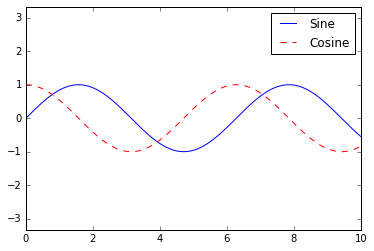

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

> But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

但除此之外还有很多能自定义图例的方法。例如，我们可以指定图例位置并且去除边框：

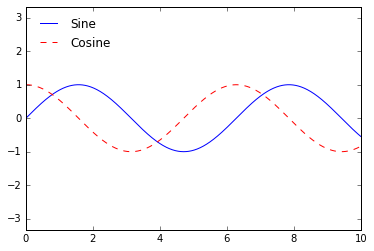

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

> We can use the ``ncol`` command to specify the number of columns in the legend:

我们可以使用`ncol`属性设置图例中每行的列数：

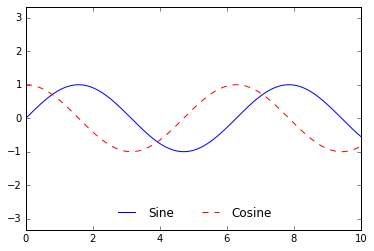

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

> We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

还可以使用圆角方框（`fancybox`）或者增加阴影，设置方框的透明度（alpha值）或修改文字的边距：

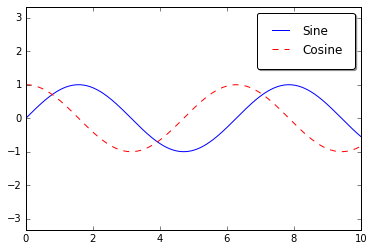

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

> For more information on available legend options, see the ``plt.legend`` docstring.

要获取更多legend函数的可用选项信息，请参考`plt.legend`的文档字符串。

## Choosing Elements for the Legend

## 选择设置图例的元素

> As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

正如我们前面例子所示，绘制的图例默认包括所有带标签的元素。如果这不是想要的效果，我们可以调整哪些元素和标签会出现在图例当中，这可以通过设置plot函数或方法返回的对象实现。`plt.plot`函数能够同时产生多条折线，然后将这些线条的实例列表返回。将其中的部分实例传递到`plt.legend()`函数就能设置哪些线条会出现在图例中，再通过一个标签的列表指定图例的名称：

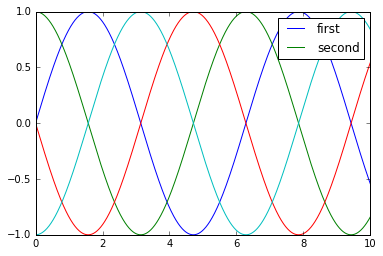

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines是一个线条实例的列表
plt.legend(lines[:2], ['first', 'second']);

> I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

作者更加倾向于使用第一种方式，因为更加清晰。通过将标签应用在图表元素上，然后绘制到图例中：

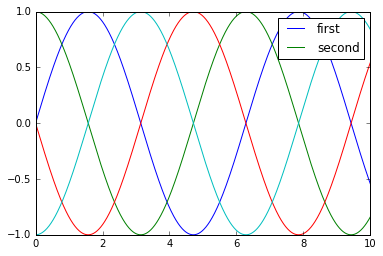

In [8]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

> Notice that by default, the legend ignores all elements without a ``label`` attribute set.

请注意默认情况下，legend会忽略所有不带标签的元素。

## Legend for Size of Points

## 散点大小的图例

> Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

某些情况下默认的图例不足以满足特定的可视化需求。例如，你在使用散点的大小来标记数据的某个特征，然后希望创建一个相应的图例。下面的例子是加州城市人口的散点图，我们使用散点的大小表现该城市的面积，散点的颜色来表现城市的人口数量（自然对数值）。我们希望使用一个图例来指明散点尺寸的比例，同时用一个颜色条来说明人口数量，我们可以通过自定义绘制一些标签数据来实现尺寸图例(利用plt.scatter命令实现，但是该命令中没有指定x和y,指定了label标签属性值)：

译者注：新版Matplotlib已经取消aspect参数，此处改为使用新的`'scaled'`参数调用axis函数。

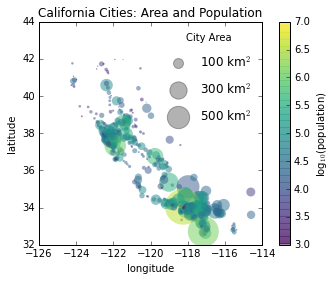

In [9]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# 提取我们感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 绘制散点图，使用尺寸代表面积，颜色代表人口，不带标签
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面我们创建图例：
# 使用空列表绘制图例中的散点，使用不同面积和标签，带透明度
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

> The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

之前的图例都关联着图表上的一些对象，因此如果我们需要展示图例的话我们首先需要绘制图表元素。在上例中，我们需要的图例对象（灰色圆圈）不在图表上，因此我们采用绘制空列表的方式将它们仿造在图表上（实际上图上没有点），但是还是需要注意，只有那些带标签的元素才会出现在图例中。

> By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

通过绘制空列表，我们创建了三个带标签的对象，然后就可以出现在图例当中，这个图例就能表示出有关城市面积的相关信息。这个策略在很多复杂可视化图表构建过程中都被用到。

> Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements.
For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit, which we'll explore in [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb).

最后我们注意到这个图表实际上是一个地理位置图表，如果我们能在上面绘制州界线或其他地图相关的元素的话，会更加清晰。Matplotlib提供了一个Basemap额外工具集来实现这个目标，我们会在[使用Basemap创建地理位置图表](04.13-Geographic-Data-With-Basemap.ipynb)中学习到它。

## Multiple Legends

## 多重图例

> Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

有时候我们可能需要在同一个图表维度中设计多个图例。不幸的是，Matplotlib并没有提供很简单的方式实现：通过标准的`legend`接口，只能在整张图表上创建一个图例。如果你试图使用`plt.legend()`或`ax.legend()`创建第二个图例，那么第二条语句创建的图例会覆盖第一条语句创建的。我们只能通过从底层开始来创建一个新的图例artist这种方法来解决这个问题，然后使用`ax.add_artist()`的底层方法手动将第二个作者加到图表上：

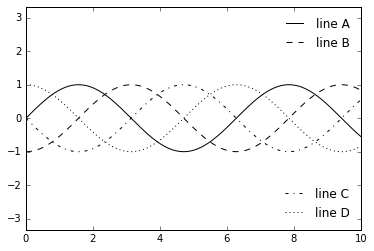

In [10]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一个图例的线条和标签
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 手动创建第二个图例，并将作者添加到图表中
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

> This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of ``ax.legend()`` (recall that you can do this with within the IPython notebook using ``ax.legend??``) you'll see that the function simply consists of some logic to create a suitable ``Legend`` artist, which is then saved in the ``legend_`` attribute and added to the figure when the plot is drawn.

上例展示了用来组成任何Matplotlib图表的底层artist对象的简单说明。如果你去查看`ax.legend()`的源代码（你可以通过IPython的`ax.legend??`帮助工具做到），你可以看到这个方法包含了用来构建合适`Legend`的artist对象的逻辑，构建的对象被保存在`legend_`属性当中，当绘制时被添加到图表上进行展示。

<!--NAVIGATION-->
< [直方图, 分桶和密度](04.05-Histograms-and-Binnings.ipynb) | [目录](Index.ipynb) | [自定义颜色条](04.07-Customizing-Colorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.06-Customizing-Legends.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
